In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.jet()
font = {'family' : 'serif', 'size'   : 25}
mpl.rcParams['xtick.labelsize'] = 25
mpl.rcParams['ytick.labelsize'] = 25
mpl.rc('font', **font)

In [3]:
path_astro="/home/toshiba/Development/Transients/Astronomy/"
prediction_file=path_astro+"Models/multiclass/validation_19_targets.npy"
pred=np.load(prediction_file)                         # Prediction for object

In [4]:
df=pd.read_pickle("Analysis_Transients.pkl")
df.dtypes

CRTS_ID            object
Path               object
Dates              object
Classification     object
N_Seq              object
N_Total            object
Flux_Med          float64
SN_Av             float64
Amp                object
Prediction         object
Probabilities      object
dtype: object

In [26]:
ID=df.CRTS_ID.to_numpy()
flux=df.Flux_Med.to_numpy()
sgn=df.SN_Av.to_numpy()
amp=df.Amp.to_numpy()
clas=df.Classification.to_numpy()
pred=df.Prediction.to_numpy()
pro=df.Probabilities.to_numpy()
pro=np.stack(pro, axis=0 )
nsq=df.N_Seq.to_numpy()

In [35]:
pro.T[0].shape


(6740,)

In [7]:
print(clas.shape)
print(pred.shape)

(6740,)
(6740,)


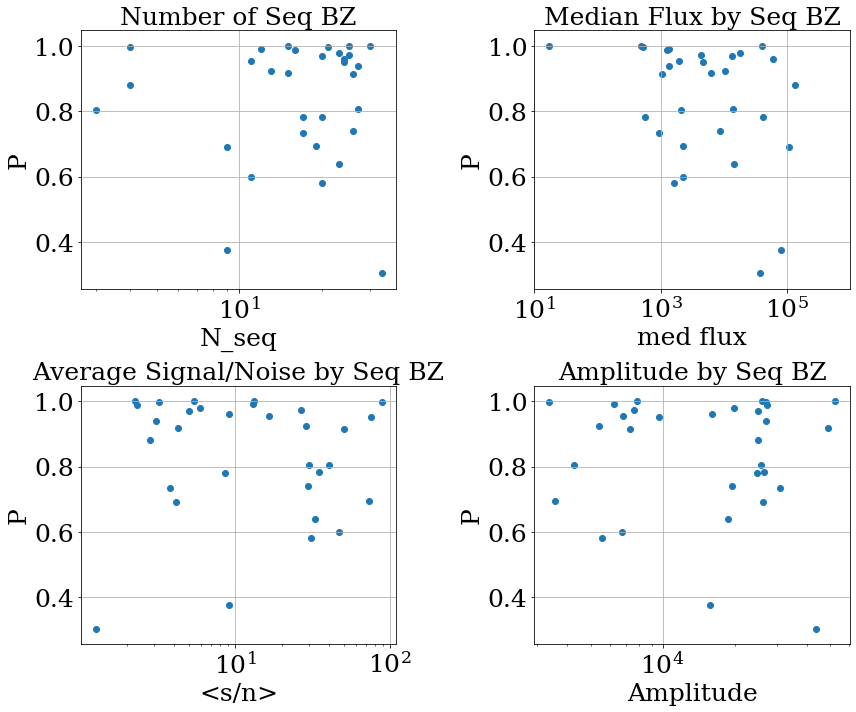

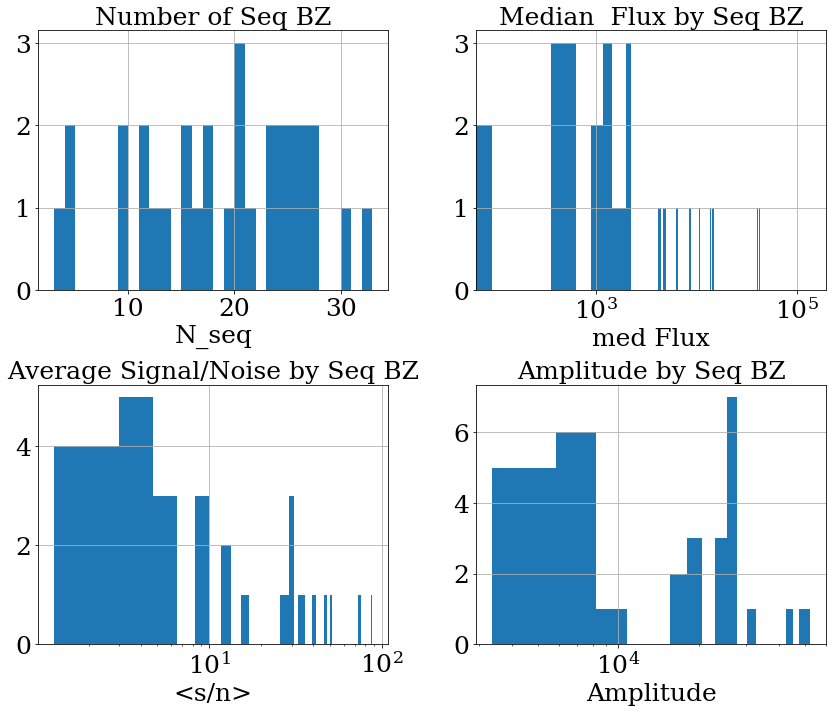

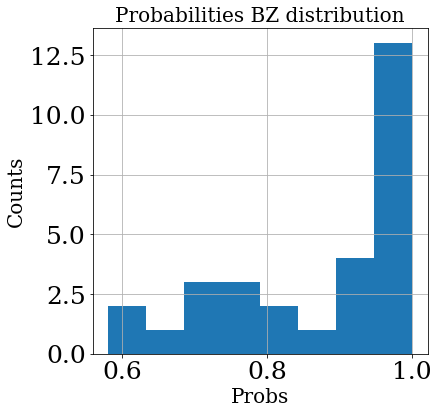

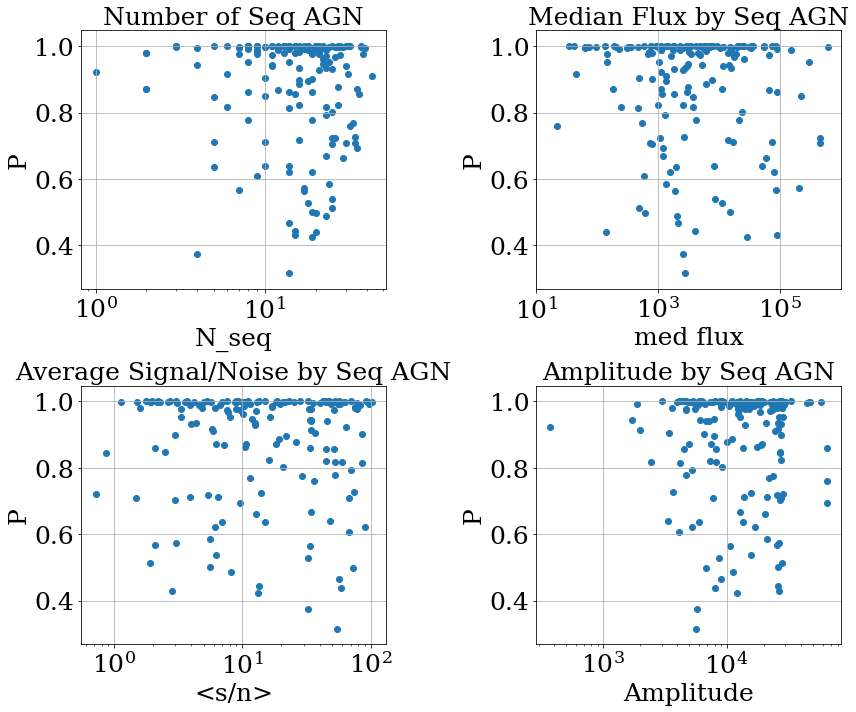

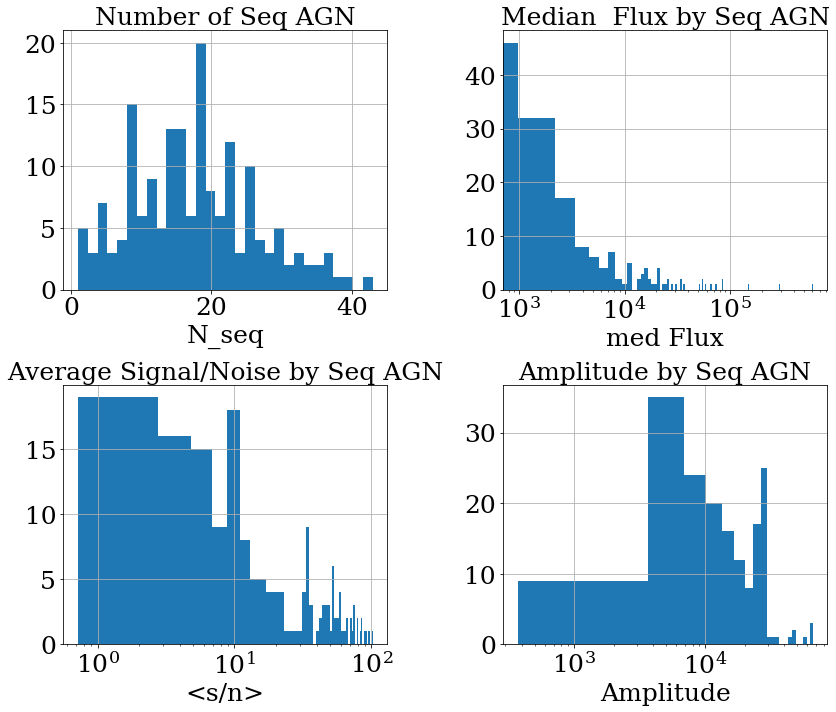

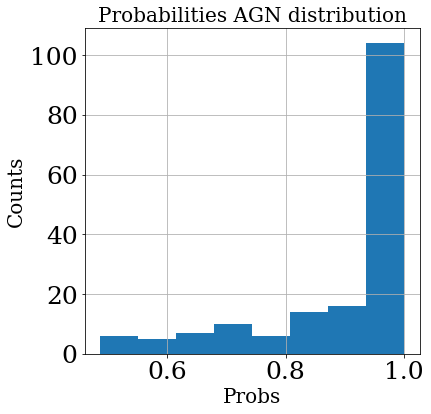

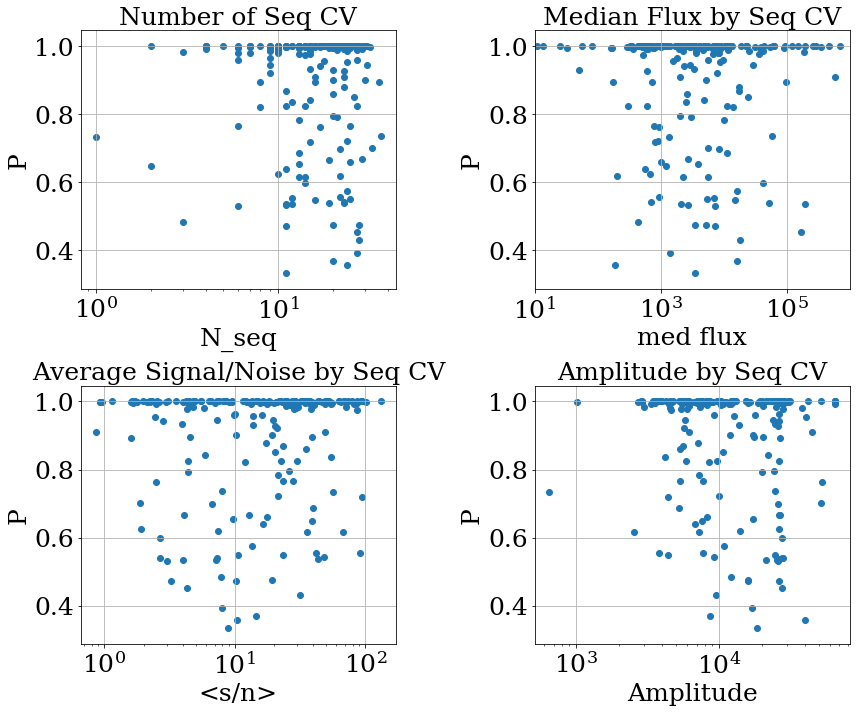

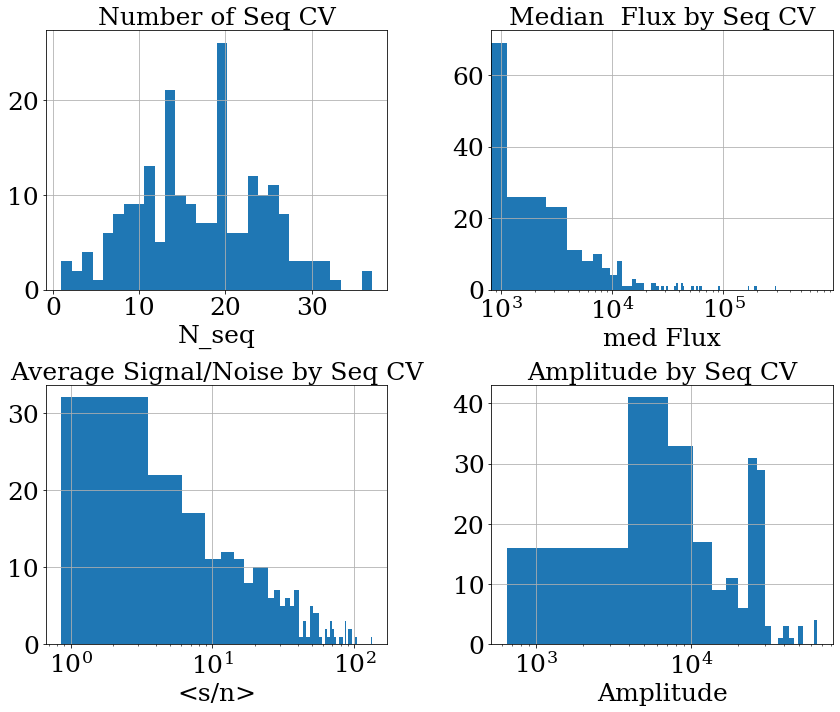

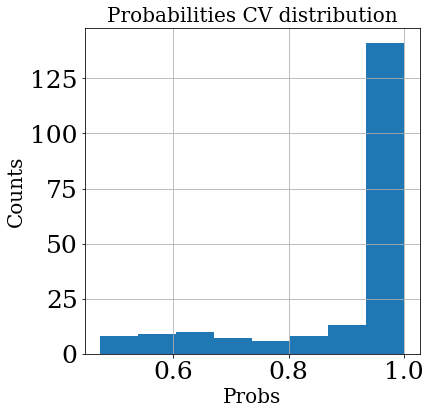

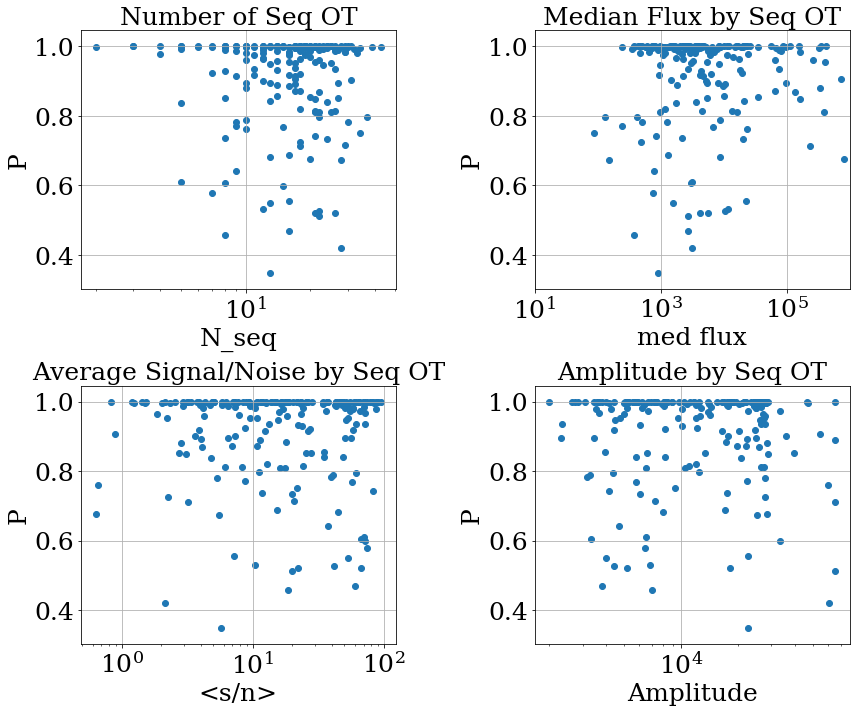

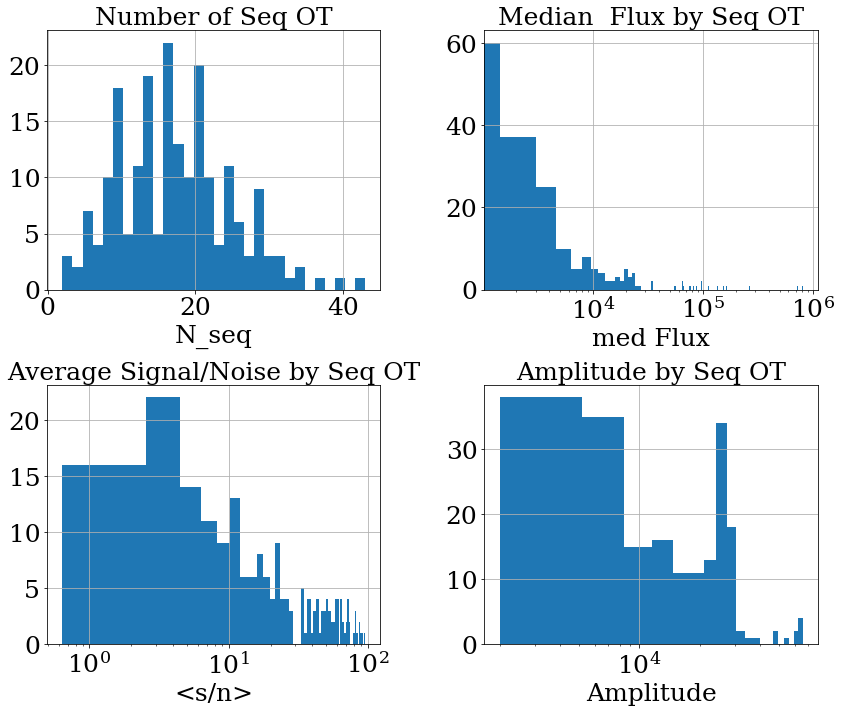

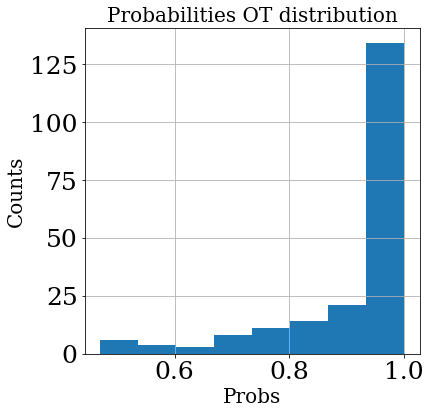

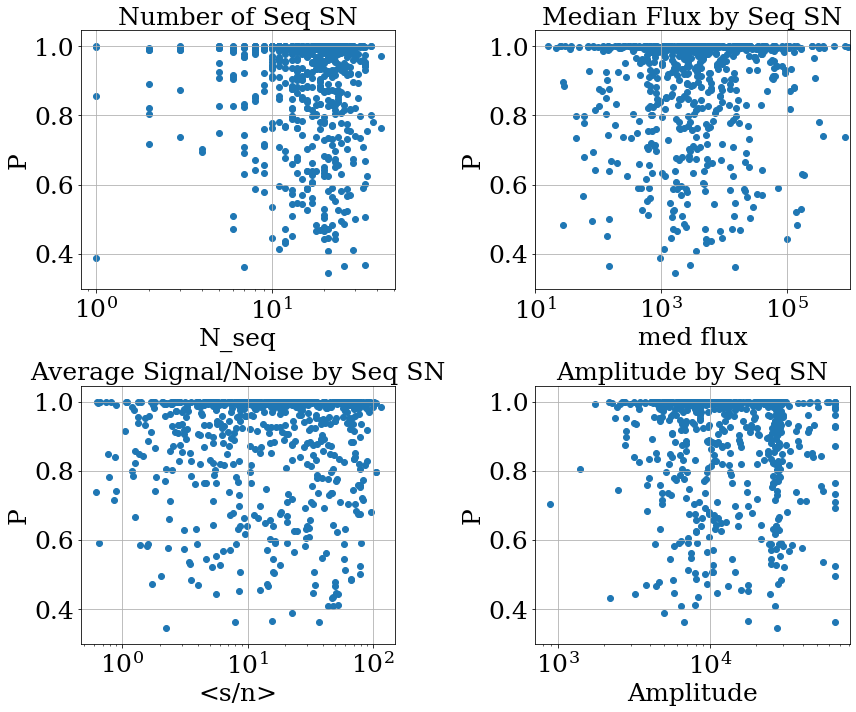

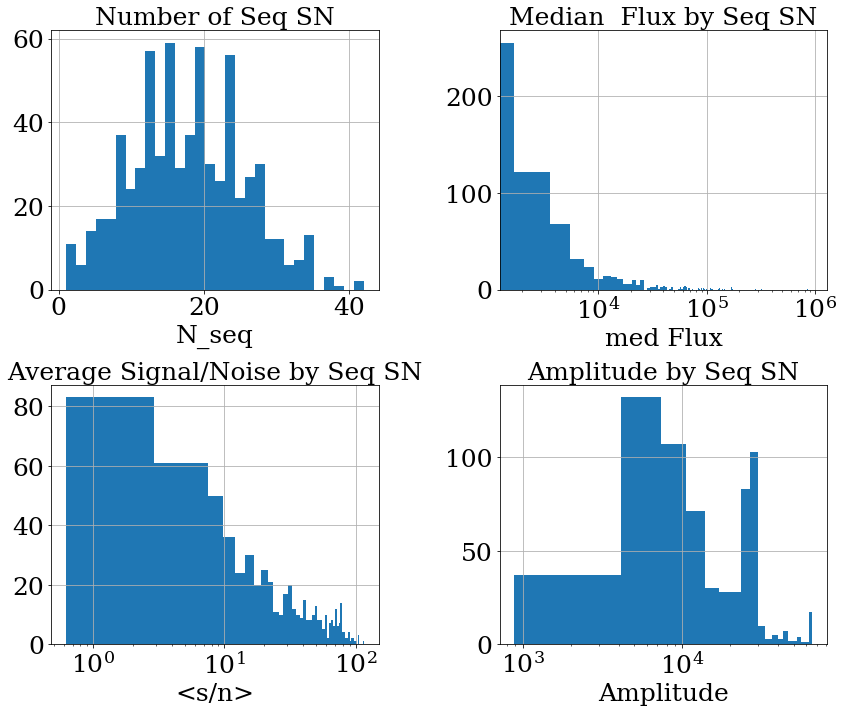

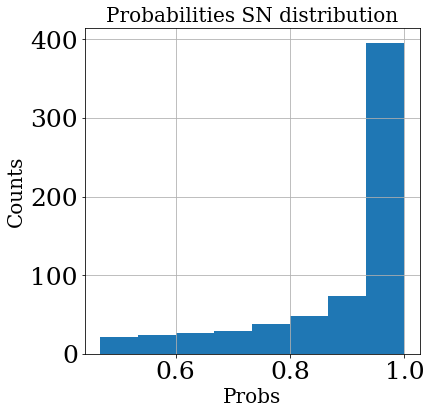

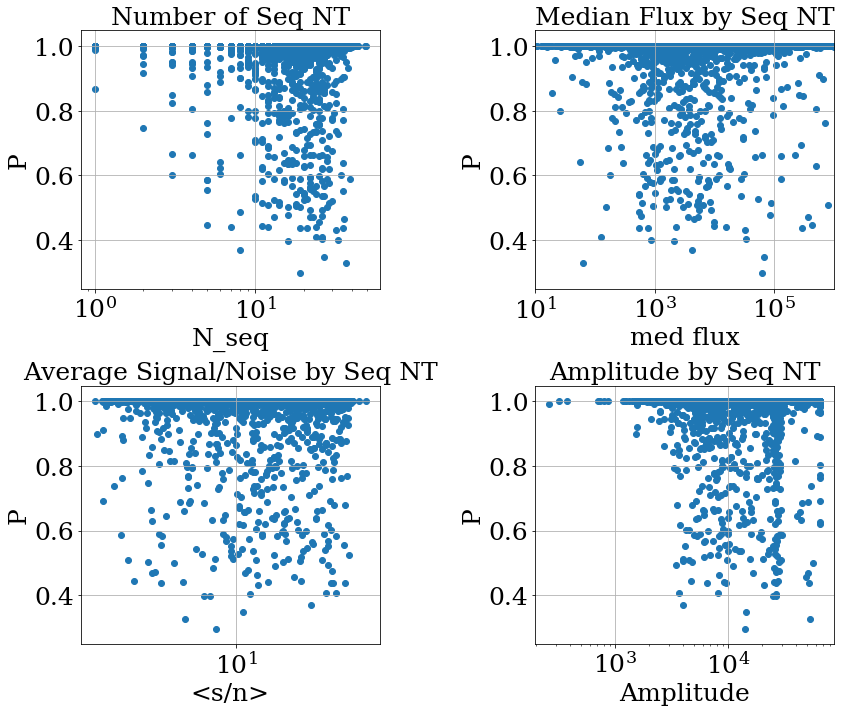

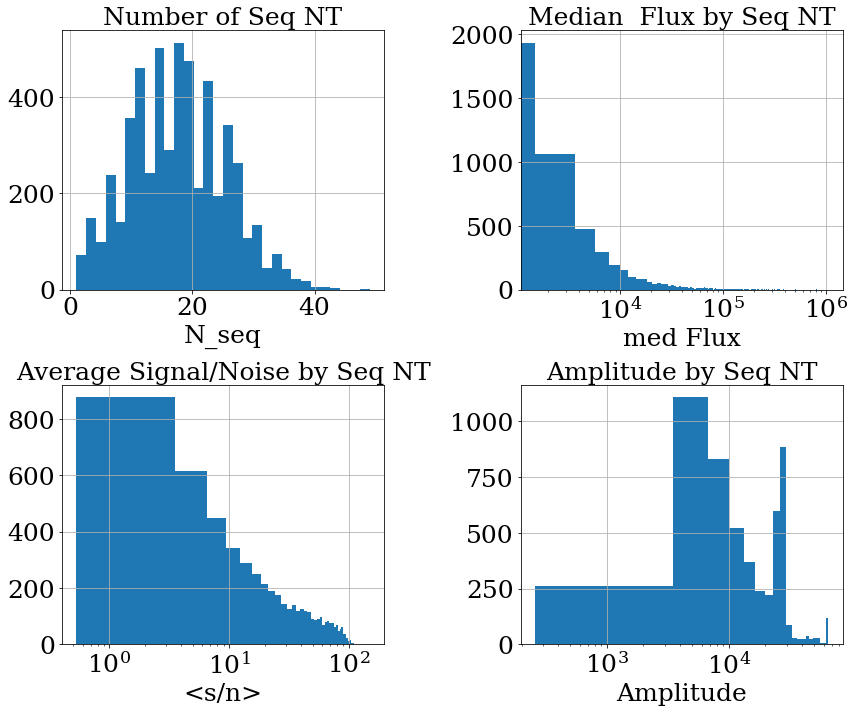

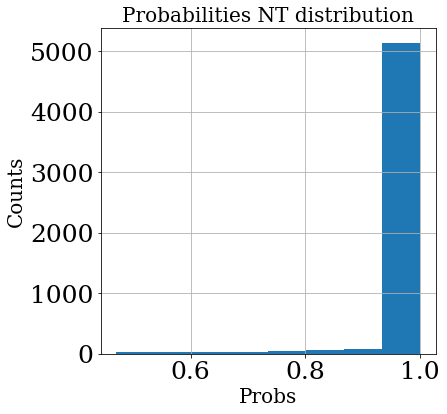

In [39]:
# # 0:bz, 1:agn, 2:cv, 3:other, 4:sn, 5:no_transiente
cl=['BZ','AGN','CV','OT','SN','NT']

for i in range(len(cl)):
    Obj_name=cl[i]
    cond = (pred==i)
    
    NSeq = df.N_Seq.to_numpy()[cond]
    Amp = df.Amp.to_numpy()[cond]
    Flux = df.Flux_Med.to_numpy()[cond]
    Sgn = df.SN_Av.to_numpy()[cond]
    Prob = pro.T[i][(cond)]

    fig = plt.figure(figsize=(12,10))
    plt.subplot(2,2,1)
    plt.title("Number of Seq "+Obj_name,size=25)
    plt.xlabel("N_seq",size=25)
    plt.ylabel("P",size=25)
    plt.scatter(NSeq,Prob)
    plt.grid()
    plt.xscale("log")

    plt.subplot(2,2,2) 
    plt.title("Median Flux by Seq "+Obj_name,size=25)
    plt.xlabel("med flux",size=25)
    plt.ylabel("P",size=25)
    plt.scatter(Flux,Prob)
    plt.xscale("log")
    plt.grid()
    plt.xlim(10,1000000)

    plt.subplot(2,2,3)
    plt.title("Average Signal/Noise by Seq "+Obj_name,size=25)
    plt.xlabel("<s/n>",size=25)
    plt.ylabel("P",size=25)
    plt.scatter(Sgn,Prob)
    plt.grid()
    plt.xscale("log")

    plt.subplot(2,2,4)
    plt.title("Amplitude by Seq "+Obj_name,size=25)
    plt.xlabel("Amplitude",size=25)
    plt.ylabel("P",size=25)
    plt.scatter(Amp,Prob)
    plt.grid()
    plt.xscale("log")

    plt.tight_layout()
    plt.savefig("Features_Prob_"+Obj_name+".pdf")
    plt.show()
    
    fig = plt.figure(figsize=(12,10))
    plt.subplot(2,2,1)
    plt.title("Number of Seq "+Obj_name,size=25)
    plt.hist(NSeq,bins=30)
    plt.xlabel("N_seq",size=25)
    plt.grid()

    plt.subplot(2,2,2)
    plt.title("Median  Flux by Seq "+Obj_name,size=25)
    plt.hist(Flux,bins=500)
    plt.xlabel("med Flux",size=25)
    plt.grid()
    plt.xscale("log")

    plt.subplot(2,2,3)
    plt.title("Average Signal/Noise by Seq "+Obj_name,size=25)
    plt.hist(Sgn,bins=50)
    plt.xlabel("<s/n>",size=25)
    plt.grid()
    plt.xscale("log")

    plt.subplot(2,2,4)
    plt.title("Amplitude by Seq "+Obj_name,size=25)
    plt.hist(Amp,bins=20)
    plt.xlabel("Amplitude",size=25)
    plt.grid()
    plt.xscale("log")

    plt.tight_layout()
    plt.savefig("Features_Hist"+Obj_name+".pdf")
    plt.show()
    
    fig = plt.figure(figsize=(6,6))
    _=plt.title("Probabilities "+Obj_name+" distribution",size=20)
    _=plt.hist(Prob[(Prob > 0.4678)],bins=8)
    _=plt.xlabel("Probs",size=20)
    _=plt.ylabel("Counts",size=20)
    _=plt.grid()
    _=plt.savefig("Prob_Hist"+Obj_name+".pdf")
    _=plt.show()